In [2]:
import pandas as pd
import numpy as np
import polars as pl
from time import time

## Medium file 1.7 GB
download from : https://1drv.ms/u/s!AshXydSImrVzgZlEUoWuJ6NjEWZWsg?e=5licuH

### Read CSV

#### using pandas 2.0 with numpy

In [2]:
%%timeit
df_np = pd.read_csv('medium_file.csv')

1min 1s ± 948 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### using pandas 2.0 with pyarrow

In [2]:
%%timeit
df_arrow = pd.read_csv('medium_file.csv',engine='pyarrow',dtype_backend='pyarrow')

6.58 s ± 255 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### using polars

In [2]:
%%timeit
df_pl = pl.read_csv("medium_file.csv")

5.71 s ± 277 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### groupby method

#### using pandas 2.0 with numpy

In [ ]:
df_np = pd.read_csv('medium_file.csv')

In [ ]:
%%timeit
df_np.groupby('Category Name')['Sale (Dollars)'].mean()

#### using pandas 2.0 with pyarrow

In [ ]:
df_arrow = pd.read_csv('medium_file.csv',engine='pyarrow',dtype_backend='pyarrow')

In [ ]:
%%timeit
df_arrow.groupby('Category Name')['Sale (Dollars)'].mean()

#### using polars

In [ ]:
df_pl = pl.read_csv("medium_file.csv")

In [ ]:
%%timeit
df_pl.groupby('Category Name').agg([
    pl.col("Sale (Dollars)").mean()
])

### merge method

#### using pandas 2.0 with numpy

In [ ]:
df_np = pd.read_csv('medium_file.csv')

In [ ]:
df_city = pd.read_csv('us_inCities.csv')

In [ ]:
df_city.Name=df_city.Name.str.upper()

In [ ]:
%%timeit
df_merge=df_np.merge(df_city, how='left', left_on='City',right_on='Name')

#### using pandas 2.0 with pyarrow

In [ ]:
df_arrow = pd.read_csv('medium_file.csv',engine='pyarrow',dtype_backend='pyarrow')

In [ ]:
%%timeit
df_merge=df_arrow.merge(df_city, how='left', left_on='City',right_on='Name')

#### using polars

In [ ]:
df_pl = pl.read_csv("medium_file.csv")

In [ ]:
df_city = pl.read_csv('us_inCities.csv')

In [ ]:
df_city=df_city.with_columns(pl.col('Name').str.to_uppercase())

In [ ]:
%%timeit
df_merge=df_pl.join(df_city, how='left', left_on='City',right_on='Name')

## Plot Barh

In [3]:
df = pd.DataFrame({
    'read_csv':[62.0,6.26,5.81],
    'Describe':[7.94,7.84,1.97],
    'Groupby':[1.56,1.84,0.414],
    'merge':[4.65,7.11,0.928]
    
  }, 
  index=['pandas_numpy','pandas_pyarrow','polars']
)

df

,read_csv,Describe,Groupby,merge
pandas_numpy,62.00,7.94,1.560,4.650
pandas_pyarrow,6.26,7.84,1.840,7.110
polars,5.81,1.97,0.414,0.928


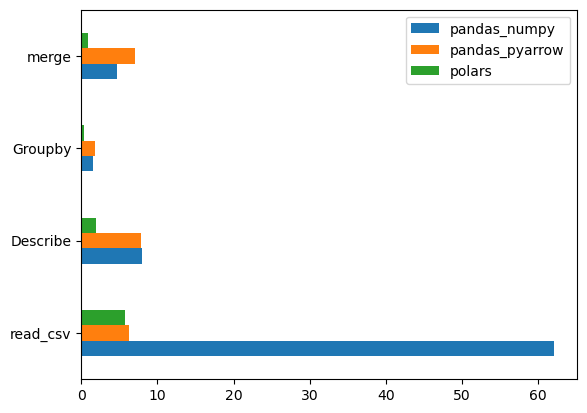

In [4]:
df.T.plot.barh();